# Lorenz attractor plotting example

This example is based on the following original matplotlib's example code:

- http://matplotlib.org/examples/mplot3d/lorenz_attractor.html

In [1]:
require 'matplotlib/iruby'
Matplotlib::IRuby.activate
plt = Matplotlib::Pyplot

require 'pycall/import'
include PyCall::Import
pyimport :numpy, as: :np
pyfrom 'mpl_toolkits.mplot3d', import: :Axes3D

<class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>

In [2]:
def lorenz(x, y, z, s: 10, r: 28, b: 2.667)
  x_dot = s * (y - x)
  y_dot = r * x - y - x * z
  z_dot = x * y - b * z
  [x_dot, y_dot, z_dot]
end

:lorenz

In [3]:
dt = 0.01
stepCnt = 10_000

10000

In [4]:
# Need one more for the initial values
xs = np.empty.(PyCall.tuple(stepCnt + 1))
ys = np.empty.(PyCall.tuple(stepCnt + 1))
zs = np.empty.(PyCall.tuple(stepCnt + 1))
nil

In [5]:
# Setting initial values
xs[0], ys[0], zs[0] = 0.0, 1.0, 1.05

[0.0, 1.0, 1.05]

In [6]:
# Stepping through "time".
stepCnt.times do |i|
  # Derivatives of the X, Y, Z state
  x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
  xs[i + 1] = xs[i] + (x_dot * dt)
  ys[i + 1] = ys[i] + (y_dot * dt)
  zs[i + 1] = zs[i] + (z_dot * dt)
end

10000

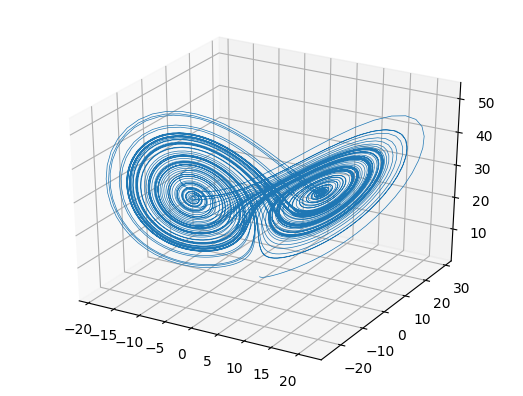

In [7]:
fig = plt.figure()
ax = fig.gca.(projection: '3d')

ax.plot.(xs, ys, zs, lw: 0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.gcf

In [8]:
plt.close